In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), '')))


from src.data.load_data import load_raw_data

In [8]:
df = load_raw_data()
df = df.drop(columns=['Unnamed: 32'])
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
df.info()
df.describe()
df['diagnosis'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

diagnosis
B    357
M    212
Name: count, dtype: int64

In [10]:
df.isnull().sum()


id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

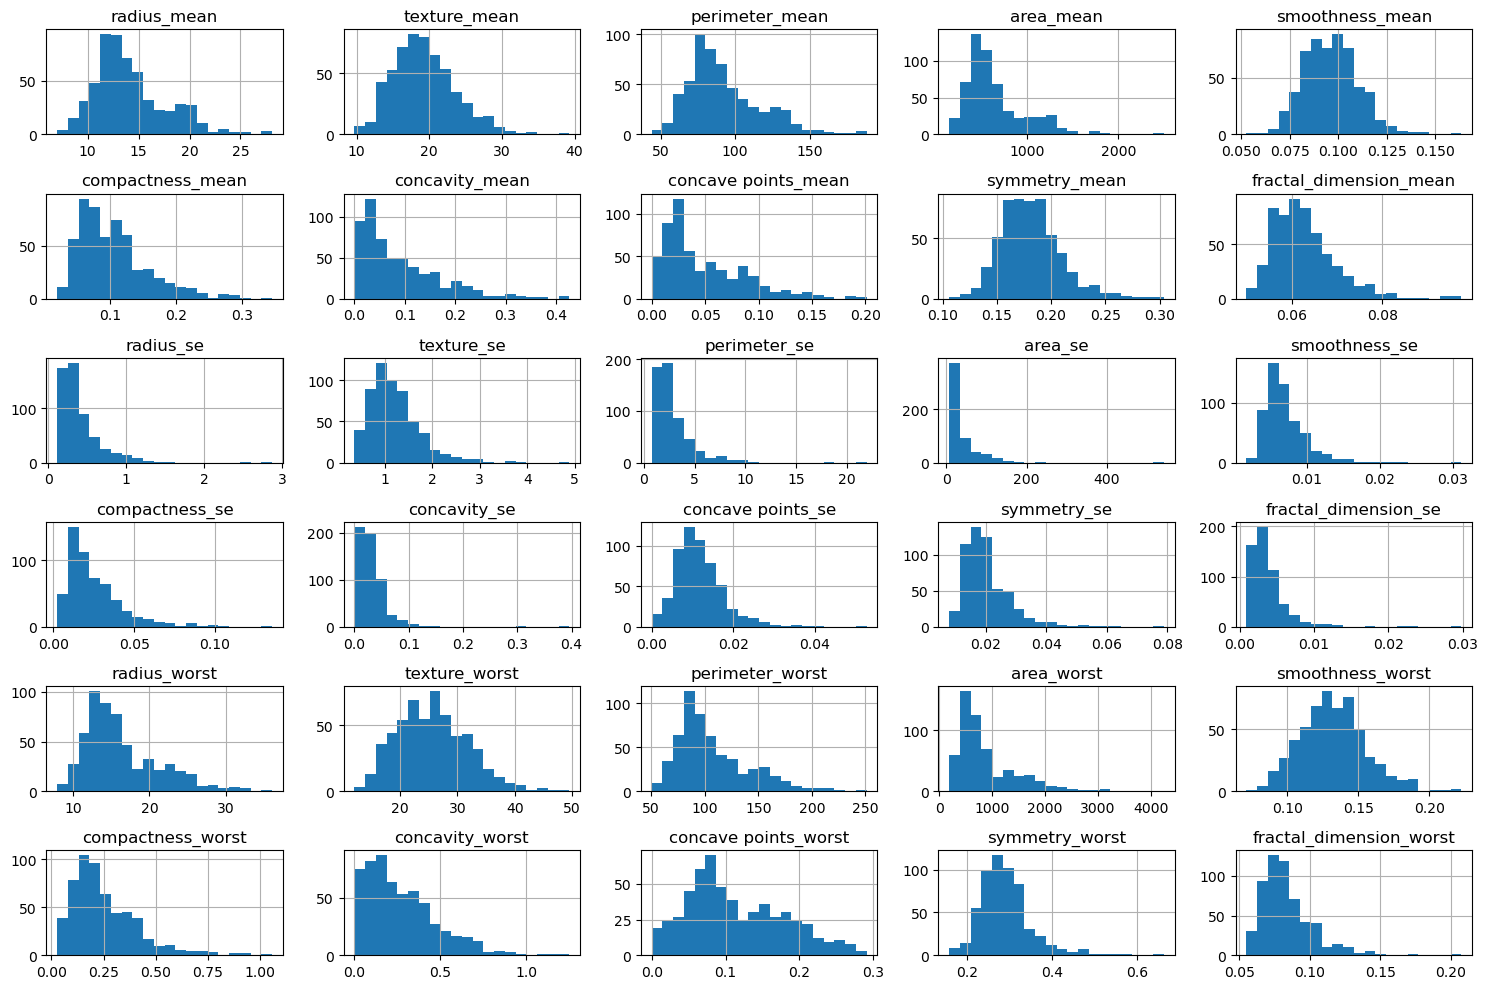

In [11]:
df.drop(columns=['id']).hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

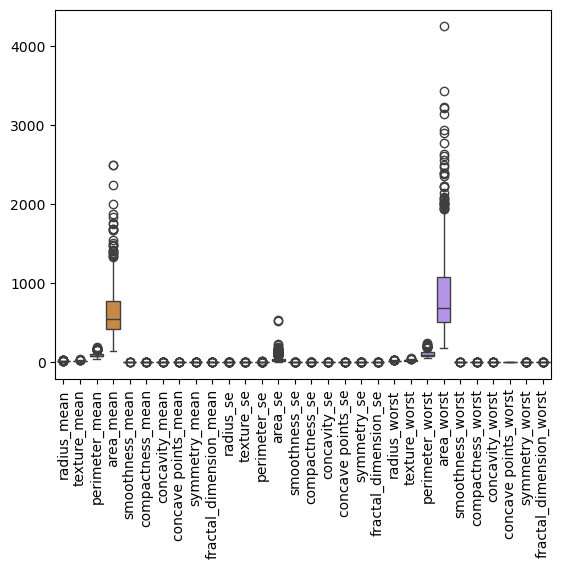

In [14]:
sns.boxplot(data=df.drop(columns=['id']))
plt.xticks(rotation=90)
plt.show()

In [16]:
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})

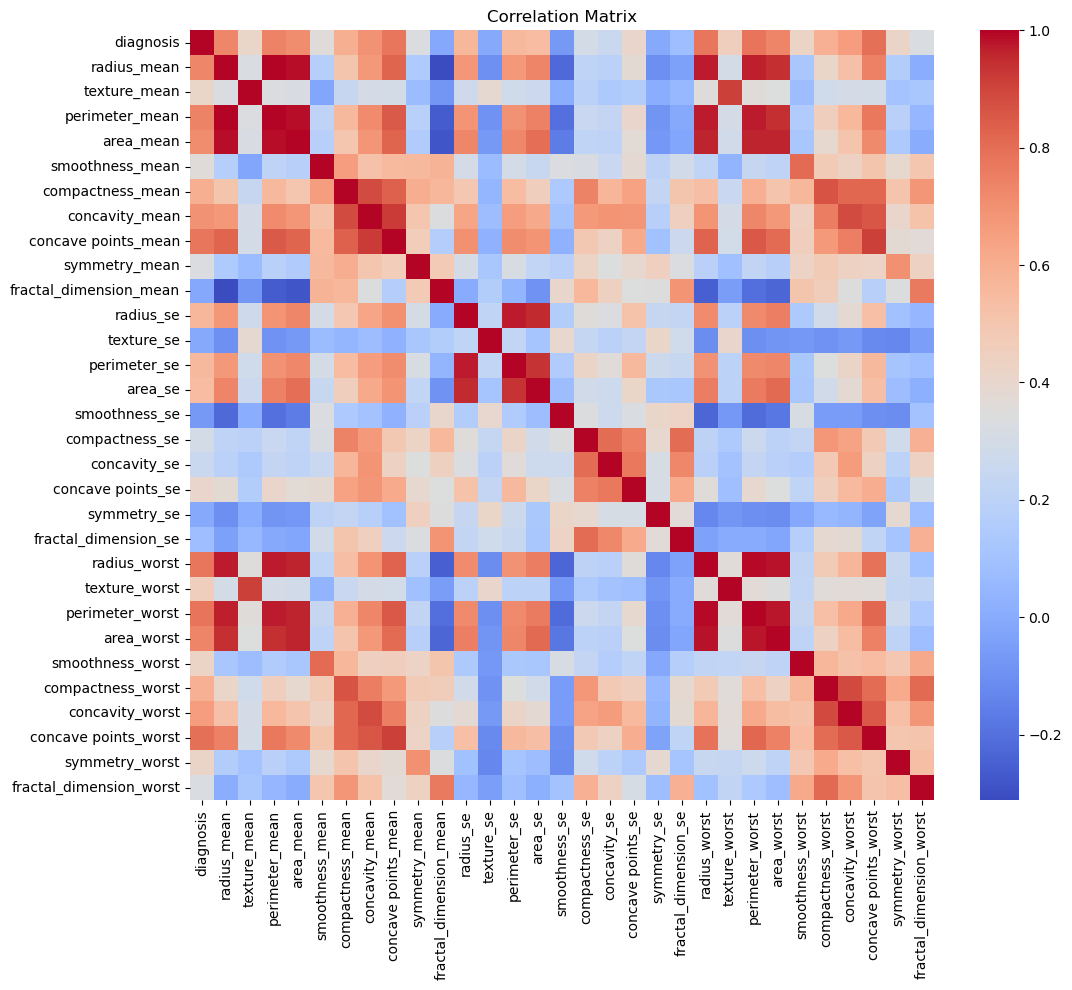

In [17]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.drop(columns=['id']).corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Matrix")
plt.show()


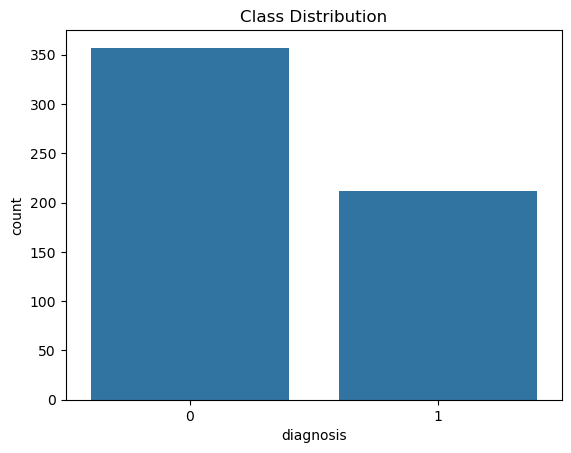

In [18]:
sns.countplot(x='diagnosis', data=df)
plt.title("Class Distribution")
plt.show()


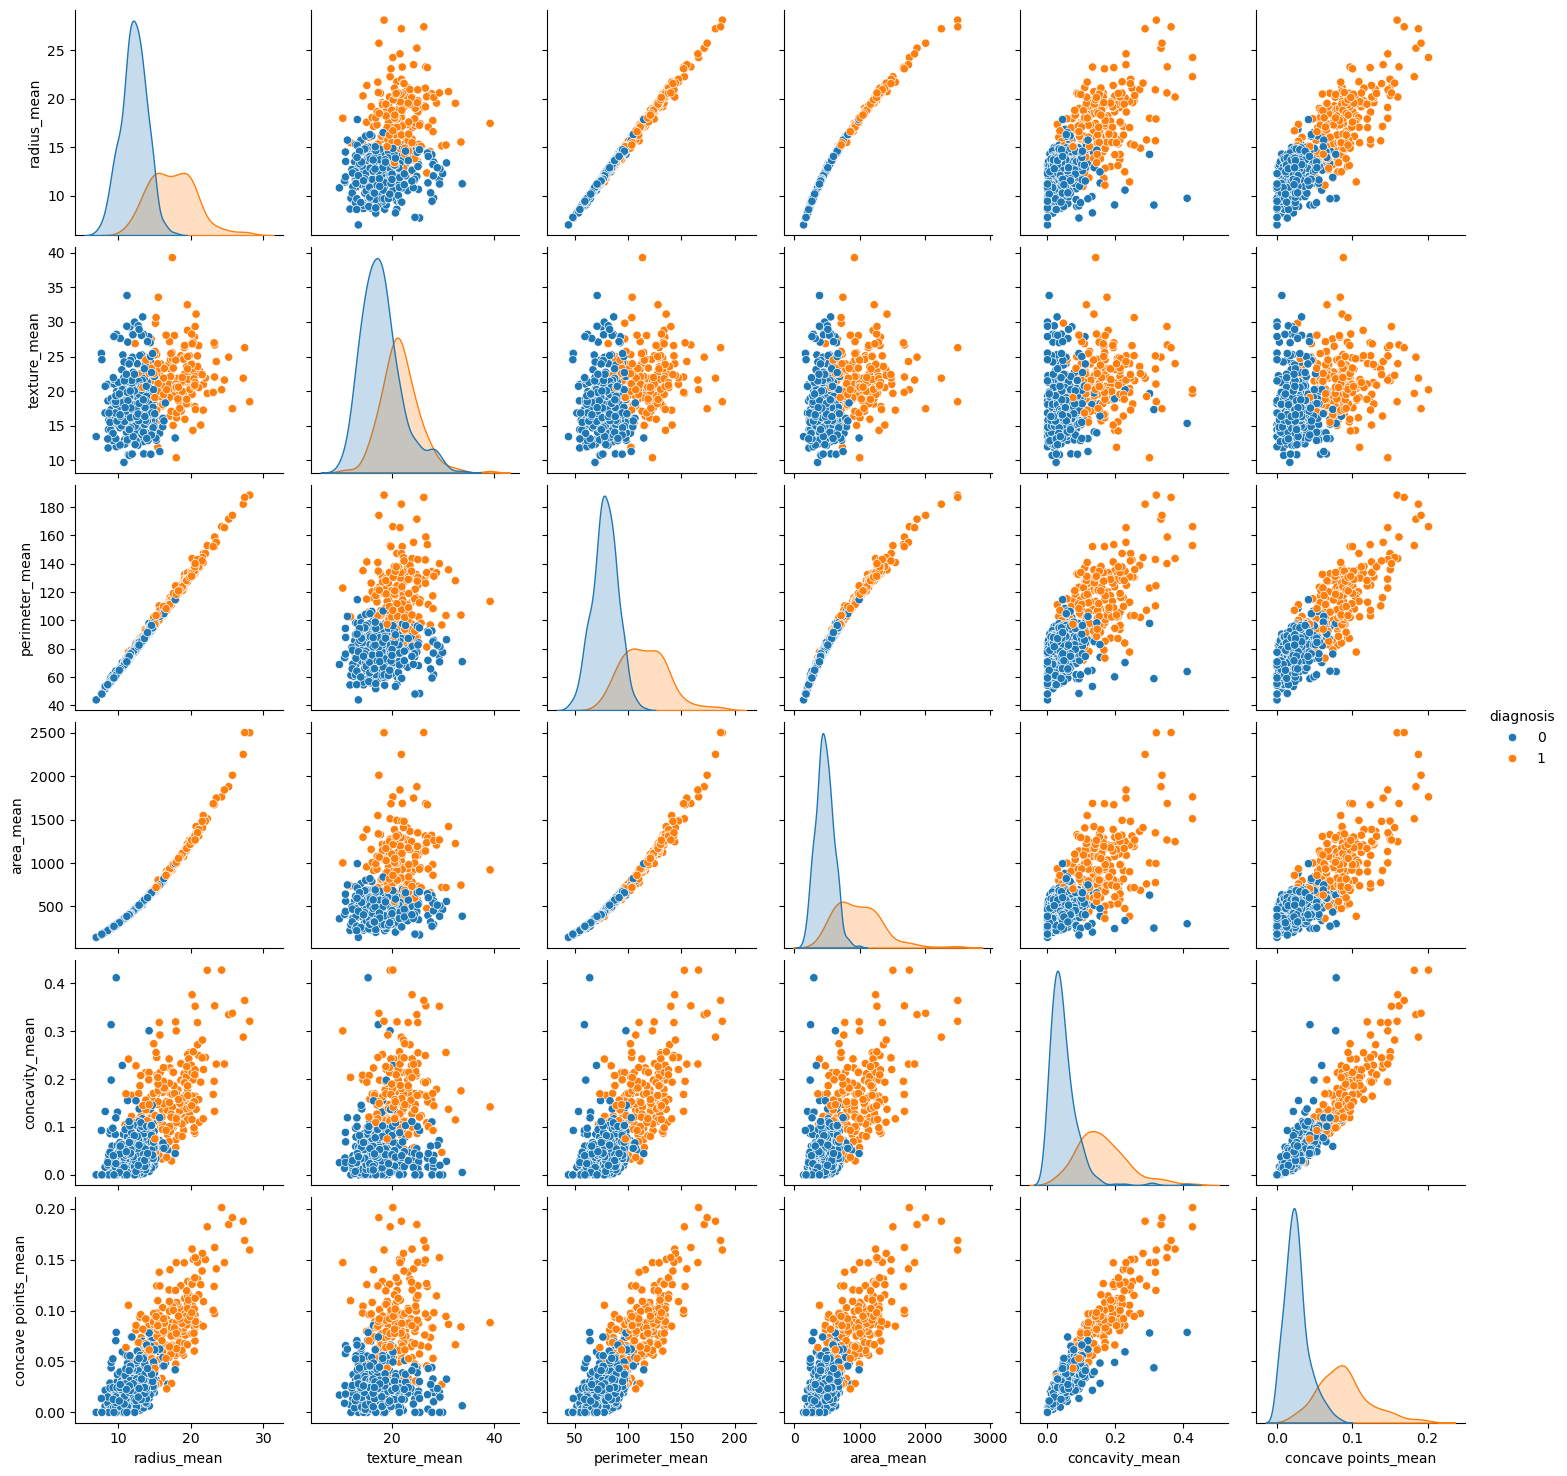

In [24]:
important_features = [
    'radius_mean', 
    'texture_mean', 
    'perimeter_mean', 
    'area_mean', 
    'concavity_mean', 
    'concave points_mean'
]
sns.pairplot(df, vars=important_features, hue='diagnosis')

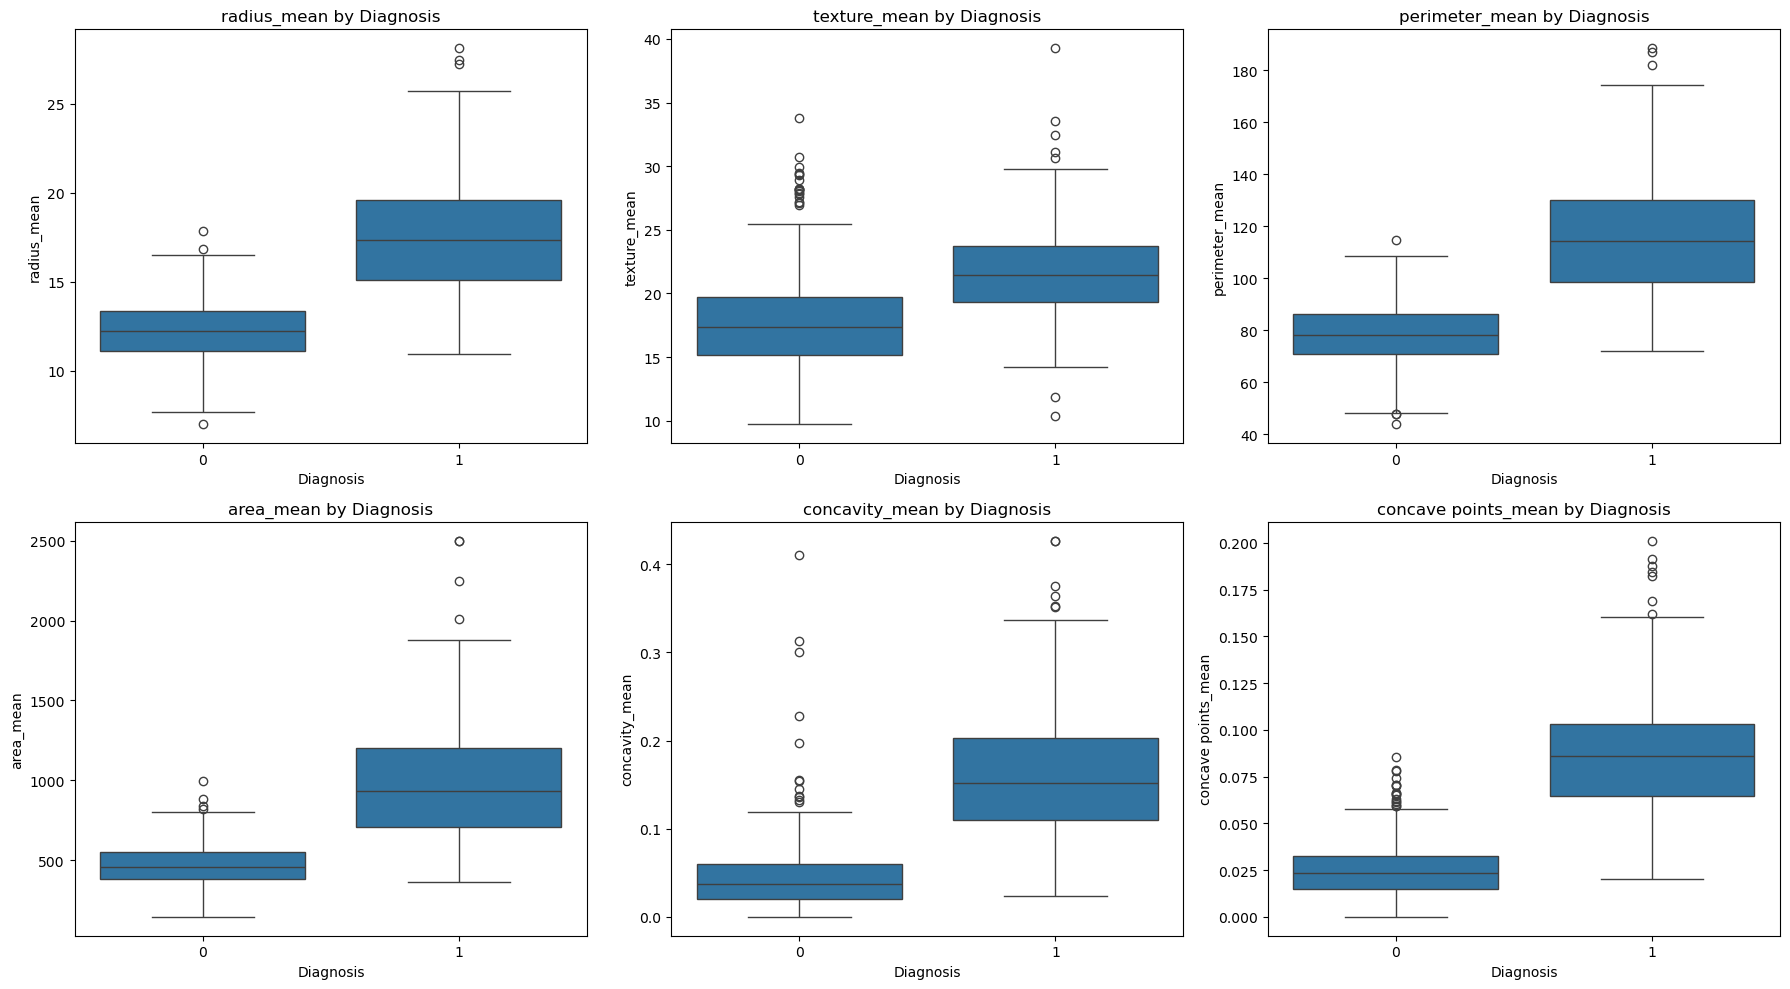

In [26]:
plt.figure(figsize=(18, 10))
important_features = [
    'radius_mean', 
    'texture_mean', 
    'perimeter_mean', 
    'area_mean', 
    'concavity_mean', 
    'concave points_mean'
]

for i, feature in enumerate(important_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='diagnosis', y=feature, data=df)
    plt.title(f"{feature} by Diagnosis")
    plt.xlabel("Diagnosis")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

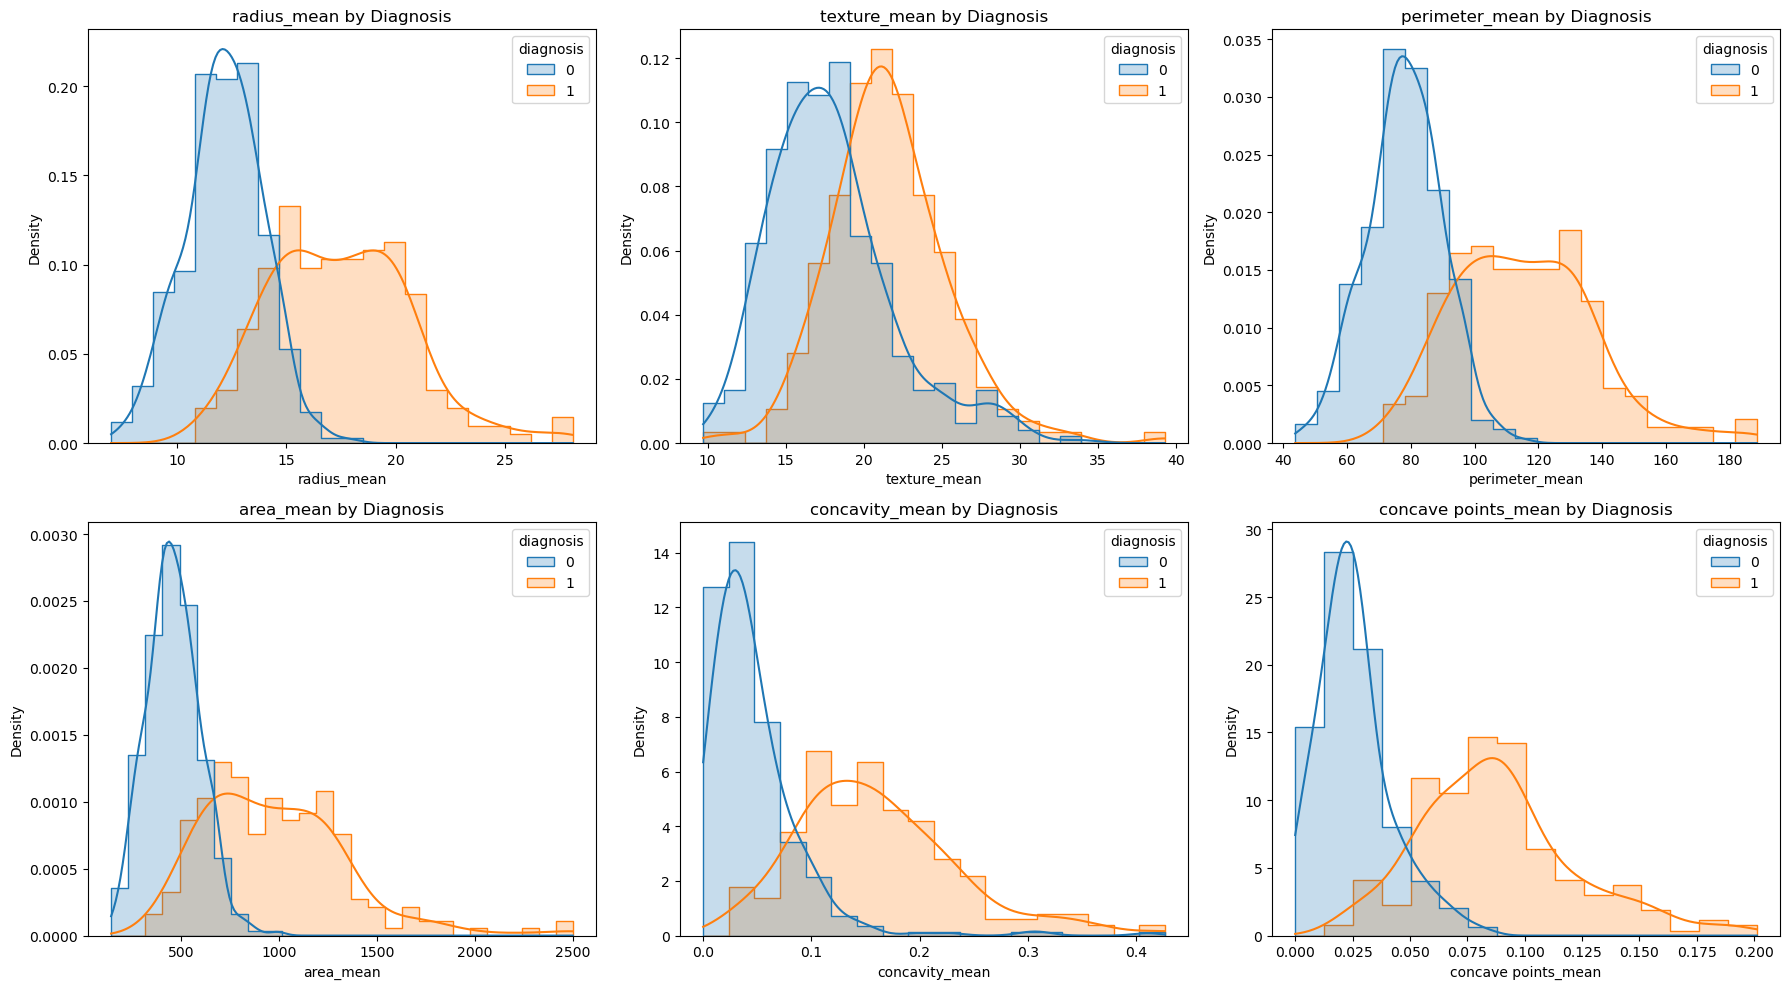

In [28]:
plt.figure(figsize=(18, 10))
important_features = [
    'radius_mean', 
    'texture_mean', 
    'perimeter_mean', 
    'area_mean', 
    'concavity_mean', 
    'concave points_mean'
]

for i, feature in enumerate(important_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df, x=feature, hue='diagnosis', kde=True, element="step", stat="density", common_norm=False)
    plt.title(f"{feature} by Diagnosis")
    plt.xlabel(feature)
    plt.ylabel("Density")

plt.tight_layout()
plt.show()


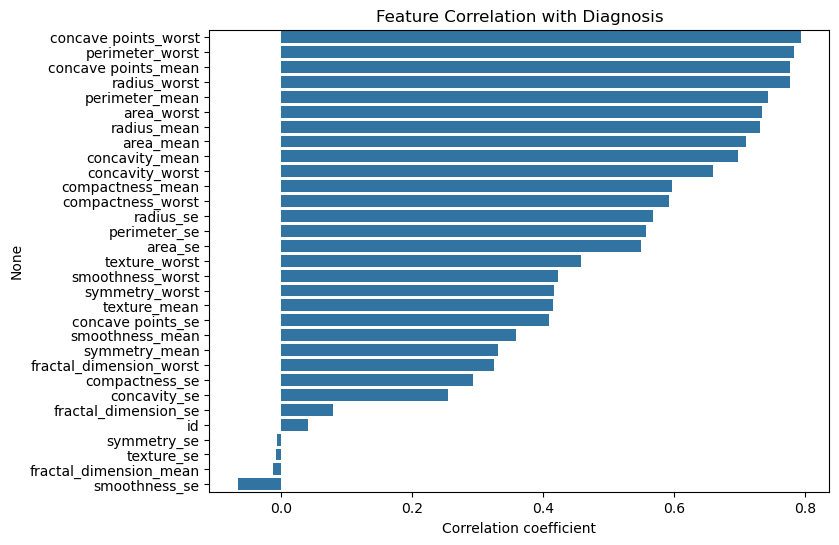

In [31]:
# Correlation with target
corr_with_target = df.corr()['diagnosis'].drop('diagnosis').sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=corr_with_target.values, y=corr_with_target.index)
plt.title("Feature Correlation with Diagnosis")
plt.xlabel("Correlation coefficient")
plt.show()

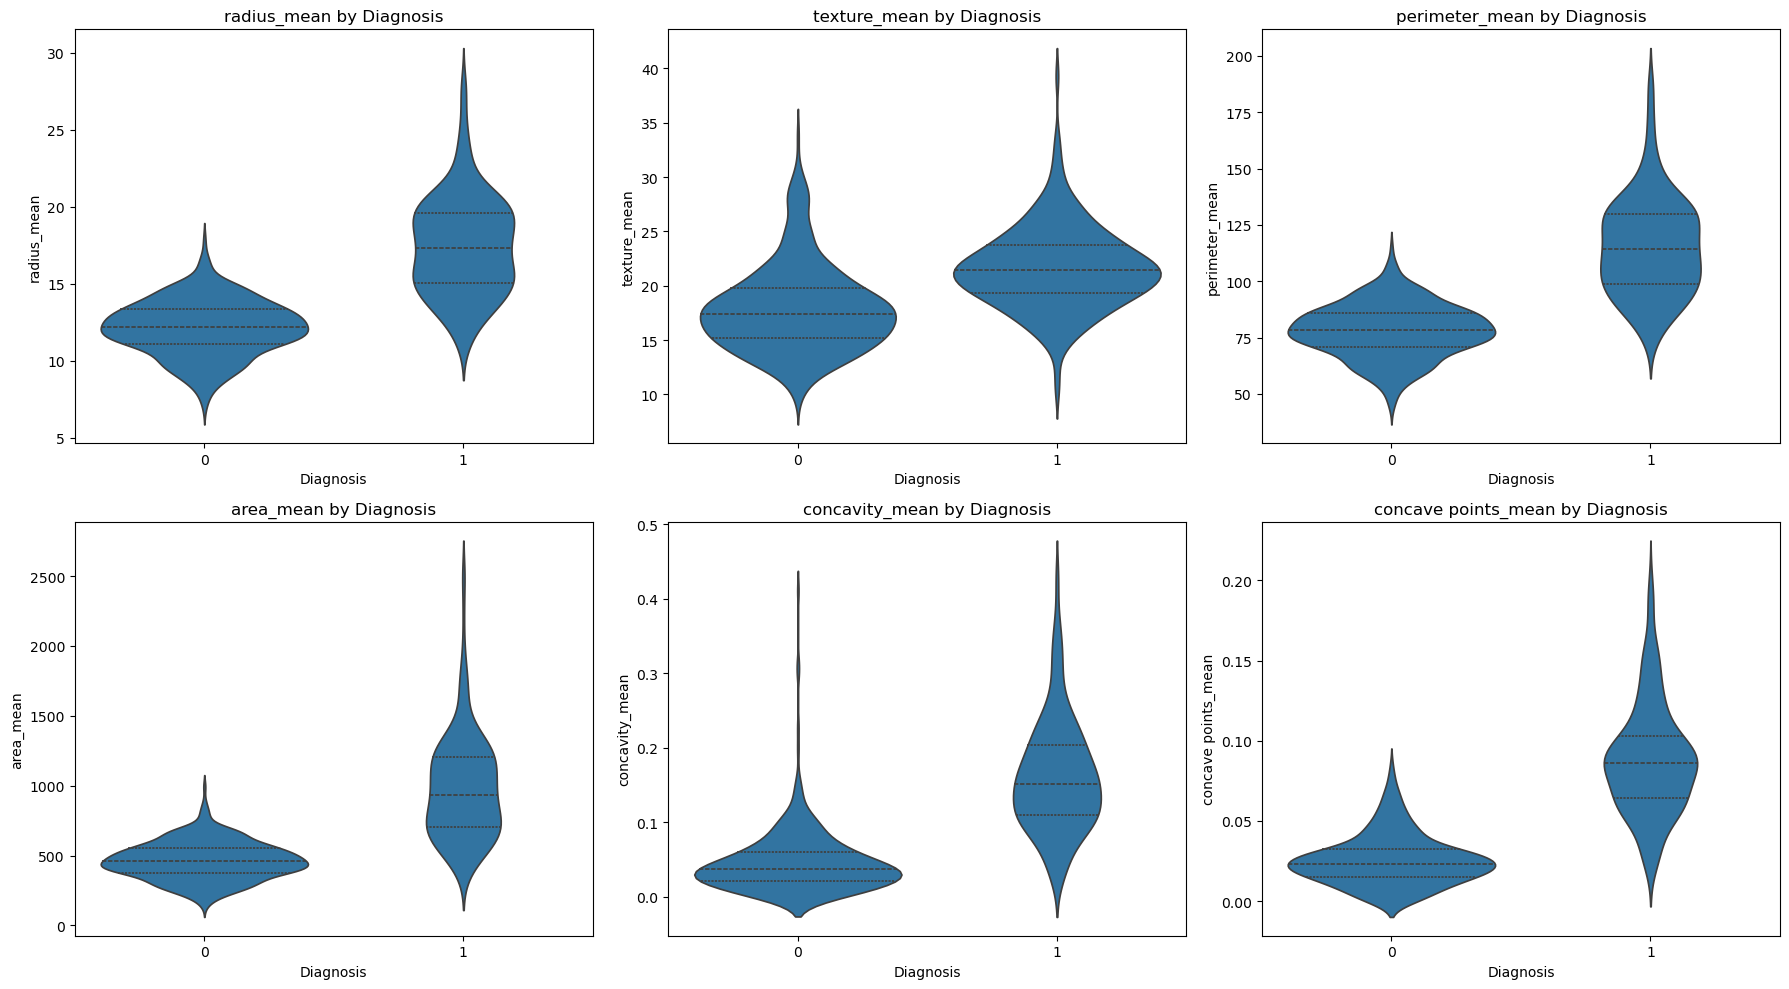

In [ ]:

plt.figure(figsize=(18, 10))
important_features = [
    'radius_mean', 
    'texture_mean', 
    'perimeter_mean', 
    'area_mean', 
    'concavity_mean', 
    'concave points_mean'
]

for i, feature in enumerate(important_features, 1):
    plt.subplot(2, 3, i)
    sns.violinplot(x='diagnosis', y=feature, data=df, inner='quartile')
    plt.title(f"{feature} by Diagnosis")
    plt.xlabel("Diagnosis")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()
